<a href="https://colab.research.google.com/github/nada-ali1711/Face-recognition/blob/main/Copy_of_19016903_19015264_19016781_PR_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Libraries**

**Contributers:**
1. Youssef Ahmed Saeed Zaki 19016903
2. Nada Ali Hassan Ahmed 19016781
3. Ahmed Adel Abudef 19015264

In [ ]:
!pip install tensorflow==2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.4 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0rc0, 2.12.0rc1)
ERROR: No matching distribution found for tensorflow==2.4


In [ ]:
!pip install -U numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install --reinstall libopenblas-base

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 1 reinstalled, 0 to remove and 22 not upgraded.
Need to get 4,748 B of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libopenblas-base amd64 0.3.8+ds-1ubuntu0.20.04.1 [4,748 B]
Fetched 4,748 B in 0s (65.3 kB/s)
(Reading database ... 128278 files and directories currently installed.)
Preparing to unpack .../libopenblas-base_0.3.8+ds-1ubuntu0.20.04.1_amd64.deb ...
Unpacking libopenblas-base:amd64 (0.3.8+ds-1ubuntu0.20.04.1) over (0.3.8+ds-1ubuntu0.20.04.1) ...
Setting up libopenblas-base:amd64 (0.3.8+ds-1ubuntu0.20.04.1) ...


In [ ]:
import numpy as np
import os
import cv2
from google.colab import drive
import scipy as scipy 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import tensorflow as tf
print(tf.test.gpu_device_name())

/device:GPU:0


## **Uploading**

---


First, We need to upload the **data** to colab and one of the famous ways to do that is by:

>   * Upload the data to your drive 
>   * Mount the drive to colab which was done by the **following cell**

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Reading and Pre-processing**

---




> Traverse all images, read them using cv2, convert each one to a vector of 10304 values, stack them to the data matrix and extract the labels for each image in the same time.



In [ ]:
IMG_WIDTH = 92
IMG_HEIGHT = 112
NUMBER_OF_FEATURES = IMG_WIDTH * IMG_HEIGHT    

In [ ]:
def loadFaces(): 
  NUMBER_OF_CLASSES = 40
  NUMBER_OF_SAMPLES = NUMBER_OF_CLASSES * 10 
  DATA_ROOT_PATH = "/content/drive/MyDrive/Cached files/FacesProblem"

  data_matrix = np.zeros((NUMBER_OF_SAMPLES, NUMBER_OF_FEATURES), dtype=np.float32)
  labels = np.zeros(NUMBER_OF_SAMPLES, dtype=np.int32)

  for s_num in range(1, 41):
      s_folder = f"{DATA_ROOT_PATH}/s{s_num}"
      for img_num in range(1, 11):
          img_path = os.path.join(s_folder, f"{img_num}.pgm")
          
          img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
          
          img_vector = img.flatten().astype(np.float32)
          data_matrix[(s_num-1)*10 + img_num-1] = img_vector
          
          labels[(s_num-1)*10 + img_num-1] = s_num
  scaler = StandardScaler()
  data_matrix = scaler.fit_transform(data_matrix)
  print("Data Matrix:\n", data_matrix, "\nData Matrix Shape: ", data_matrix.shape)
  print("Labels Vector:\n", labels)
  return data_matrix, labels

In [ ]:
def loadFacesNonFaces(nonfaces_num=100,faces_num=100): 
  NUMBER_OF_CLASSES = 2
  NUMBER_OF_SAMPLES = nonfaces_num + faces_num
  FACES_ROOT_PATH = "/content/drive/MyDrive/Cached files/FacesNonFacesProblem/faces"
  NONFACES_ROOT_PATH = "/content/drive/MyDrive/Cached files/FacesNonFacesProblem/nonfaces"
  paths = [NONFACES_ROOT_PATH,FACES_ROOT_PATH]
  data_matrix = np.zeros((NUMBER_OF_SAMPLES, NUMBER_OF_FEATURES), dtype=np.float32)
  labels = np.zeros(NUMBER_OF_SAMPLES, dtype=np.int32)

  for isFace in range(2):
    for img_num, filename in enumerate(os.listdir(paths[isFace])):
      if img_num == faces_num and isFace:
        break
      img_idx = isFace*nonfaces_num + img_num
      img_path = paths[isFace] + "/" + filename
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)      
      img_vector = img.flatten().astype(np.float32)
      data_matrix[img_idx] = img_vector
      labels[img_idx] = isFace + 1

  scaler = StandardScaler()
  data_matrix = scaler.fit_transform(data_matrix)
  print("Data Matrix:\n", data_matrix, "\nData Matrix Shape: ", data_matrix.shape)
  print("Labels Vector:\n", labels)
  return data_matrix, labels

## **Splitting**

---


### We used two approaches here as following:


1.   split the data as even row for training and odd rows for testing this guarantees that there's equally sized samples from each subject in the training and testing data.
2.   split the data according to a test ration (ex: 0.7) which will get seven images fo testing and leave three images for trainig from each subject which consists of 10 images.



In [ ]:
def even_odd_split(data_matrix, labels):
    x_train = data_matrix[::2, :]
    x_test = data_matrix[1::2, :]
    y_train = labels[::2]
    y_test = labels[1::2]
    print("X Train Samples:\n", x_train.shape[0], "\nX Test Samples:\n", x_test.shape[0])
    return x_train,x_test,y_train,y_test

In [ ]:
def split(test_ratio, data_matrix, labels):
    x_train = data_matrix[0:10, :][:(int)(test_ratio*10), :]
    x_test = data_matrix[0:10, :][-(int)((1-test_ratio)*10):, :]
    y_train = labels[:10][:(int)(test_ratio*10)]
    y_test =  labels[:10][-(int)((1-test_ratio)*10):]
    
    for i in range(10, len(data_matrix), 10):
      samples = data_matrix[i:i+10, :]
      targets = labels[i:i+10]
      x_train = np.concatenate([x_train, samples[:(int)(test_ratio*10), :]])
      x_test = np.concatenate([x_test, samples[-(int)((1-test_ratio)*10):, :]])
      y_train = np.concatenate([y_train, targets[:(int)(test_ratio*10)]])
      y_test = np.concatenate([y_test, targets[-(int)((1-test_ratio)*10):]])

    print("y Train Samples:\n", y_train, "\ny Test Samples:\n", y_test)
    return x_train,x_test,y_train,y_test
  

## **PCA**

---


Implementing PCA to reduce the dimensionality of data. 
calculating the number of dimensions required to retain alpha as following:
> The eigenvalues are sorted in descending order, and the function loops through the eigenvalues, summing them until the proportion of variance exceeds alpha.
> It then trains a K-nearest neighbors (KNN) classifier with k=1 and computes the accuracy.

In [ ]:
def _PCAfitEigon(data, alpha):
    _mean = np.mean(data,axis=0)
    Z = data - _mean
    covarianceMatrix = np.cov(np.transpose(Z))
    # compute eigenvalues and eigenvectors
    eigValues, eigVectors = scipy.linalg.eigh(covarianceMatrix)
    # calculate required no of dimensions according to alpha
    eigValuesSum = sum(eigValues);_sum = 0;_r = 0
    while (_sum/float(eigValuesSum)) < alpha:
        _sum += eigValues[-_r-1];_r+=1
    return _mean,[[eigVectors[i][-j-1] for j in range(_r)] for i in range(len(covarianceMatrix))]

def _project(centeredData,reducedBasis):
  # return projected data
  return centeredData @ reducedBasis

def runPCA(train,train_lables,test,test_lables,PCAfitter=_PCAfitEigon):
  alpha = [0.8,0.85,0.9,0.95];best=[]
  for i in alpha:
    overalMean,u = _PCAfitEigon(train,i)
    print("U:\n", u)
    print("data:\n", train-overalMean)
    projectedData = _project(train-overalMean,u)
    projectedTest = _project(test-overalMean,u)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(projectedData, train_lables)
    prediction = knn.predict(projectedTest)
    accuracy = accuracy_score(y_pred=prediction, y_true=test_lables)
    best.append(accuracy)
    
  print('for alpha ',i,' best accuracy ',best.sort(reverse=True)[0],' for k = 1')
    
  return np.amax(best);

## **LDA**

---


In this particular process, we apply a multi-class Linear Discriminant Analysis (LDA) pseudocode to a given dataset. The goal of this step is to find a reconstruction matrix that can be used to project the data onto a lower dimensional space while still maintaining important class-specific information.




> Once the reconstruction matrix is obtained, it is used to project the data onto a 39-dimensional space, where the classes are compact and well-separated. This is accomplished by maximizing the distance between the projected data points of different classes and minimizing the distance between the projected data points of the same class.

In [ ]:
def runLDA(x, y,eigonCount):
  mu = []
  num_of_classes = len(set(y))
  global_mu = np.mean(x, axis=0)
  for i in range(num_of_classes):
    x_class_i = x[y==i+1]
    mu.append(np.mean(x_class_i, axis=0))

  sb = np.zeros((x.shape[1], x.shape[1]))
  for i in range(num_of_classes):
    n_class_i = x[y==i+1].shape[0]
    mu_class_i = mu[i]
    sb += n_class_i * ((mu_class_i-global_mu) @ (mu_class_i-global_mu).T)
  print("First row of Sb\n", sb[0,:])
  s = np.zeros((x.shape[1], x.shape[1]))
  for i in range(num_of_classes):
      x_class_i = x[y==i+1]
      mu_class_i = mu[i]
      s += np.cov((x_class_i - mu_class_i).T) 
  
  print("First row of S\n", s[0,:])

  eigen_values, eigen_vectors = scipy.linalg.eigh(scipy.linalg.pinv(s) @ sb) 
  indices = np.argsort(eigen_values)[::-1]
  sorted_eigenvectors = eigen_vectors[:, indices]
  dominant_eigen_vectors = sorted_eigenvectors[:, :eigonCount]
  real_part_eigen_vectors = np.real(dominant_eigen_vectors)
  print("Dominant Eigon Vectors Count:", real_part_eigen_vectors.shape[0])
  print("First row of eigen vectors\n", real_part_eigen_vectors[0,:])

  return (real_part_eigen_vectors)

## **Classifier Tuning**

---


In this particular methodology, we utilize a K-Nearest Neighbors (KNN) classification algorithm to analyze a given dataset. Prior to classification, we perform a dimensionality reduction step on the dataset to eliminate features that are not relevant or significant. After this, the KNN algorithm is applied to the reduced dataset to build a model for classification.

> Once the model is trained, we use it to predict the outcomes of new or unseen test data based on their similarities to the previously classified data. The predictions generated by the model are then compared with the actual outcomes of the test data to evaluate the accuracy of the model.



In [ ]:
def classTuning(x_tr,y_tr,x_ts,y_ts,oddNumLimit=9,step=2):
  accuracy = []
  for i in range(1,oddNumLimit,step):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr, y_tr)
    y_predict = knn.predict(x_ts)
    accuracy.append(accuracy_score(y_pred=y_predict, y_true=y_ts))
    print("Accuracy Score when Knn =",i,":\n", accuracy[(int)((i - 1)/step)])
  plt.plot([i for i in range(1,oddNumLimit,step)], accuracy)
  plt.xlabel('K value')
  plt.ylabel('Accuracy')
  plt.title('KNN Classification Accuracy')
  plt.legend()
  plt.show()
  return np.max(accuracy)

## **Sub Drivers**
The following drivers runs **PCA** and **LDA** and do projection then run the tuning method on the projected data  

In [ ]:
def execPCA(data_matrix, x_train, y_train, x_test, y_test,tuningLimit=9,PCAfitter=_PCAfitEigon):
  alpha = [0.8,0.85,0.9,0.95]
  best=[]
  for i in alpha:
    m, U = PCAfitter(data_matrix, i)
    x_train_reduced = x_train @ U
    x_test_reduced = x_test @ U
    print("PCA Tuning for Alpha = ", i, ": ")
    accuracy = classTuning(x_train_reduced, y_train, x_test_reduced, y_test,tuningLimit)
    best.append(accuracy)
  
  print('best accuracy ',np.max(best),' for alpha =', alpha[best.index(np.max(best))])

In [ ]:
def execLDA(data_matrix, labels, x_train, y_train, x_test, y_test,eigonCount,tuningLimit=9):
  U = runLDA(data_matrix, labels,eigonCount)
  x_train_reduced = x_train @ U
  x_test_reduced = x_test @ U
  print("LDA Tuning :")
  classTuning(x_train_reduced,y_train,x_test_reduced,y_test,tuningLimit)

## **Main Driver**

First, we have the faces problem where our model recognizes to which label of the 40 loaded labels, the test face samples belong.

Data Matrix:
 [[-1.05126    -1.0250226  -1.150785   ... -0.6368793  -0.67224365
  -0.6649038 ]
 [-0.7159075  -0.71676624 -0.6727558  ... -0.95670485 -0.94235665
  -0.9378948 ]
 [-1.3027742  -1.1651392  -0.92583    ... -1.0206699  -1.122432
  -1.0516411 ]
 ...
 [ 1.1005846   0.93660915  1.0706447  ... -0.87141806 -0.8298096
  -0.8013993 ]
 [ 0.9329085   0.96463245  0.9581673  ...  0.25863227  0.40820822
   0.22231707]
 [ 1.1005846   1.0767257   1.0706447  ... -0.87141806 -0.91984725
  -0.9378948 ]] 
Data Matrix Shape:  (400, 10304)
Labels Vector:
 [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15

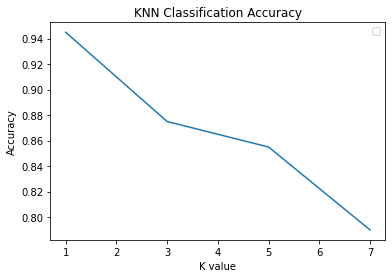

PCA Tuning for Alpha =  0.85 : 
Accuracy Score when Knn = 1 :
 0.945
Accuracy Score when Knn = 3 :
 0.89
Accuracy Score when Knn = 5 :
 0.845
Accuracy Score when Knn = 7 :
 0.755


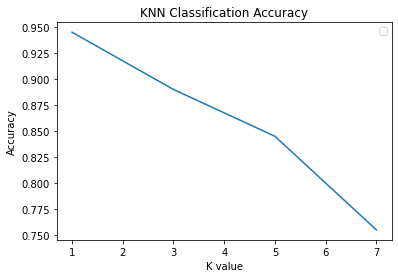

PCA Tuning for Alpha =  0.9 : 
Accuracy Score when Knn = 1 :
 0.95
Accuracy Score when Knn = 3 :
 0.895
Accuracy Score when Knn = 5 :
 0.84
Accuracy Score when Knn = 7 :
 0.755


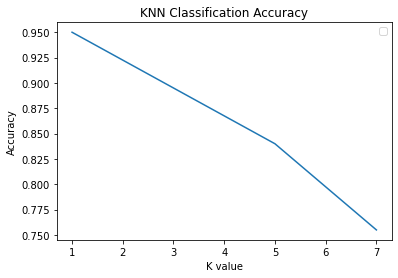

PCA Tuning for Alpha =  0.95 : 
Accuracy Score when Knn = 1 :
 0.94
Accuracy Score when Knn = 3 :
 0.88
Accuracy Score when Knn = 5 :
 0.84
Accuracy Score when Knn = 7 :
 0.755


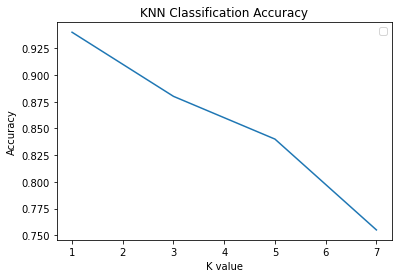

best accuracy  0.95  for alpha = 0.9
First row of Sb
 [2396490.40039062 2396490.40039062 2396490.40039062 ... 2396490.40039062
 2396490.40039062 2396490.40039062]
First row of S
 [5.37142111 5.23854802 5.18057539 ... 0.26156132 0.1972977  0.54414663]
Dominant Eigon Vectors Count: 10304
First row of eigen vectors
 [ 0.00964623 -0.00693833 -0.00881531 -0.01162553  0.00905414 -0.00663099
 -0.01238841  0.00661932 -0.01243986  0.01079793 -0.00692591  0.00850252
 -0.00505301 -0.00657906  0.00844795  0.00273171  0.00492774  0.00771955
  0.01728638 -0.0095598   0.00173323 -0.00852128  0.00302595 -0.00812613
  0.00554254 -0.00531714 -0.00712357  0.00484205  0.01501218  0.00766702
 -0.01156447  0.01358395  0.00379827  0.01563214  0.00708929  0.00526043
 -0.00576453  0.01515297 -0.00532814]
LDA Tuning :
Accuracy Score when Knn = 1 :
 0.925


Accuracy Score when Knn = 3 :
 0.865
Accuracy Score when Knn = 5 :
 0.755
Accuracy Score when Knn = 7 :
 0.71


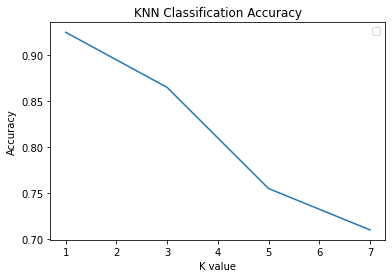

In [ ]:
#Faces Problem
data_matrix, labels = loadFaces()
x_train, x_test, y_train, y_test = even_odd_split(data_matrix, labels)

execPCA(data_matrix, x_train, y_train, x_test, y_test)

execLDA(data_matrix, labels, x_train, y_train, x_test, y_test,39)

Now, the nonfaces-faces classification problem. Binary classification model that detects whether test sample is a face or not a face.

Data Matrix:
 [[ 1.9004946   1.924512    1.878938   ...  2.4223938   2.4838204
   2.3291805 ]
 [ 1.7836626   1.8061715   1.7627524  ...  1.3000059   1.5538454
   2.3435595 ]
 [ 0.11880374  0.09023461  0.20877089 ...  1.0053791   0.9100164
   0.9775556 ]
 ...
 [ 0.20642789  0.17898998  0.1797245  ... -0.88865066 -0.82116807
  -0.57537526]
 [ 0.13340776 -0.07248354  0.0054462  ... -0.36954623 -0.20595373
  -0.27341646]
 [ 0.17721984  0.14940485  0.1797245  ... -0.90268046 -0.86408997
  -0.8198181 ]] 
Data Matrix Shape:  (200, 10304)
Labels Vector:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
X Train Samples:
 100 
X Test Samples:
 

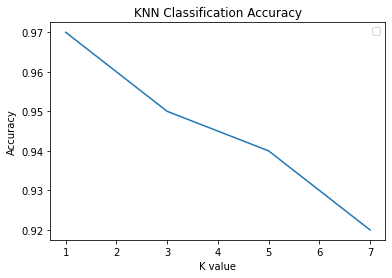

Data Matrix:
 [[ 1.9929537   2.0226438   1.9900023  ...  2.6168647   2.7221673
   2.504141  ]
 [ 1.8708998   1.8986979   1.8675354  ...  1.4284313   1.726875
   2.5192926 ]
 [ 0.13163175  0.10148079  0.22954042 ...  1.1164674   1.0378263
   1.0798893 ]
 ...
 [ 0.22317217  0.19444029  0.19892369 ... -0.8890144  -0.8149488
  -0.5564852 ]
 [ 0.14688848 -0.06894496  0.01522332 ... -0.33936384 -0.15652463
  -0.23830123]
 [ 0.1926587   0.16345379  0.19892369 ... -0.9038698  -0.8608854
  -0.81406265]] 
Data Matrix Shape:  (180, 10304)
Labels Vector:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
X Train Samples:
 90 
X Test Samples:
 90
Nonfaces : faces =  4 : 5
First row of Sb


Accuracy Score when Knn = 7 :
 0.9555555555555556


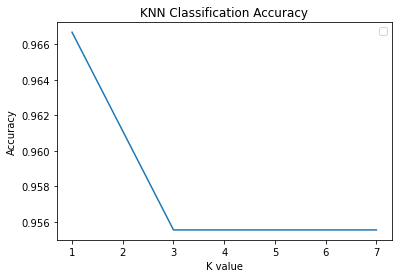

Data Matrix:
 [[ 2.110349    2.1493583   2.1071427  ...  2.885546    3.043147
   2.7721417 ]
 [ 1.9838802   2.0206423   1.9804449  ...  1.600806    1.9541774
   2.7886133 ]
 [ 0.18170007  0.15425824  0.28586188 ...  1.2635618   1.2002752
   1.2238274 ]
 ...
 [ 0.27655163  0.25079533  0.25418743 ... -0.9044368  -0.82688415
  -0.5550872 ]
 [ 0.19750866 -0.02272644  0.06414076 ... -0.31024462 -0.10648868
  -0.20918716]
 [ 0.24493445  0.2186163   0.25418743 ... -0.92049605 -0.8771443
  -0.83510154]] 
Data Matrix Shape:  (160, 10304)
Labels Vector:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]
X Train Samples:
 80 
X Test Samples:
 80
Nonfaces : faces =  3 : 5
First row of Sb
 [243022.03369141 243022.03369141 24302

Dominant Eigon Vectors Count: 10304
First row of eigen vectors
 [-0.00984934  0.0076848   0.00762222  0.00609697  0.00895023  0.00608356
 -0.00340974  0.00484912  0.0019882  -0.0038649   0.0063957   0.01130031
  0.00315258  0.00373432 -0.01217331  0.00295134 -0.01292055 -0.01205507
 -0.00733255 -0.00313609 -0.00202046  0.00822708 -0.01438551  0.00631722
 -0.00310056  0.00376404  0.00469566 -0.00147249  0.01129875  0.01690431
 -0.00492726  0.00272468  0.00422905  0.01923831  0.0068973  -0.00493812
 -0.00113671 -0.00230632 -0.01337905]
LDA Tuning :
Accuracy Score when Knn = 1 :
 0.975
Accuracy Score when Knn = 3 :
 0.9625
Accuracy Score when Knn = 5 :
 0.95
Accuracy Score when Knn = 7 :
 0.95


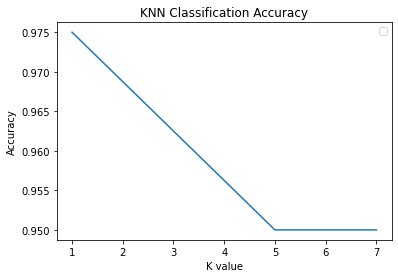

Data Matrix:
 [[ 2.3570933   2.3900921   2.3386598  ...  3.175783    3.3447797
   3.0535247 ]
 [ 2.2171175   2.2489872   2.2005477  ...  1.7924299   2.1721673
   3.0712483 ]
 [ 0.22246163  0.20296444  0.3532961  ...  1.4292998   1.360359
   1.3875054 ]
 ...
 [ 0.3274435   0.30879322  0.31876802 ... -0.905108   -0.8225037
  -0.52664435]
 [ 0.23995861  0.00894505  0.11159965 ... -0.2653073  -0.04677563
  -0.1544486 ]
 [ 0.29244953  0.27351695  0.31876802 ... -0.9223999  -0.8766242
  -0.82794577]] 
Data Matrix Shape:  (140, 10304)
Labels Vector:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
X Train Samples:
 70 
X Test Samples:
 70
Nonfaces : faces =  2 : 5
First row of Sb
 [225855.98876953 225855.98876953 225855.98876953 ... 225855.98876953
 225855.988

Dominant Eigon Vectors Count: 10304
First row of eigen vectors
 [ 0.00934332 -0.00743519  0.00788475  0.00595549 -0.00741083  0.00855567
 -0.00752448 -0.00454397  0.00431348  0.00229701  0.00627406 -0.00981198
 -0.00630257  0.00529075 -0.01005781 -0.00932658 -0.01317454  0.01033063
  0.00962328 -0.00539853  0.00625669 -0.00693753  0.00501348 -0.01103347
  0.00504859  0.00635922 -0.00474805  0.00089981  0.01379198 -0.00635215
  0.0064557   0.00557898 -0.00622507 -0.00689888  0.00981375 -0.00452373
 -0.00330815 -0.00177051  0.00372369]
LDA Tuning :
Accuracy Score when Knn = 1 :
 0.9571428571428572
Accuracy Score when Knn = 3 :
 0.9142857142857143
Accuracy Score when Knn = 5 :
 0.8857142857142857
Accuracy Score when Knn = 7 :
 0.8857142857142857


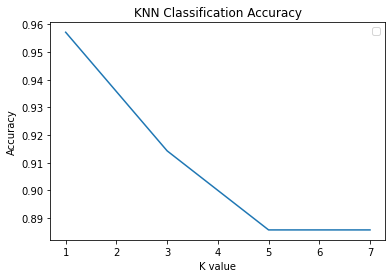

Data Matrix:
 [[ 2.5031533   2.560517    2.5256827  ...  3.4193296   3.654268
   3.318555  ]
 [ 2.3566988   2.4115415   2.3793547  ...  1.9100388   2.357662
   3.3380904 ]
 [ 0.26972055  0.2513962   0.42221737 ...  1.5138501   1.4600116
   1.4822391 ]
 ...
 [ 0.3795615   0.36312786  0.38563535 ... -1.0330781  -0.9536704
  -0.62757075]
 [ 0.2880274   0.04655485  0.16614328 ... -0.3350311  -0.0959156
  -0.21732995]
 [ 0.34294787  0.32588398  0.38563535 ... -1.0519443  -1.0135138
  -0.9596705 ]] 
Data Matrix Shape:  (120, 10304)
Labels Vector:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
X Train Samples:
 60 
X Test Samples:
 60
Nonfaces : faces =  1 : 5
First row of Sb
 [298736.26831055 298736.26831055 298736.26831055 ... 298736.26831055
 298736.26831055 298736.26831055]
First row of S
 [2.

In [ ]:
#FacesآNonFaces Problem
#First Trial : Equal face-nonface quantity
data_matrix, labels = loadFacesNonFaces()
x_train, x_test, y_train, y_test = even_odd_split(data_matrix, labels)
execLDA(data_matrix, labels, x_train, y_train, x_test, y_test,1)

#Decreasing nonfaces wrt faces quantity --> Accuracy increases
for i in range(4,0,-1):
  data_matrix, labels = loadFacesNonFaces(i*20)
  x_train, x_test, y_train, y_test = even_odd_split(data_matrix, labels)
  print("Nonfaces : faces = ",i,": 5")
  execLDA(data_matrix, labels, x_train, y_train, x_test, y_test,1)

#Increasing nonfaces wrt faces quantity --> Accuracy decreases
data_matrix, labels = loadFacesNonFaces(faces_num=20)
x_train, x_test, y_train, y_test = even_odd_split(data_matrix, labels)
print("Nonfaces : faces = 5 : 1")
execLDA(data_matrix, labels, x_train, y_train, x_test, y_test,1)  

Trying out faces problem with more training samples

Data Matrix:
 [[-1.05126    -1.0250226  -1.150785   ... -0.6368793  -0.67224365
  -0.6649038 ]
 [-0.7159075  -0.71676624 -0.6727558  ... -0.95670485 -0.94235665
  -0.9378948 ]
 [-1.3027742  -1.1651392  -0.92583    ... -1.0206699  -1.122432
  -1.0516411 ]
 ...
 [ 1.1005846   0.93660915  1.0706447  ... -0.87141806 -0.8298096
  -0.8013993 ]
 [ 0.9329085   0.96463245  0.9581673  ...  0.25863227  0.40820822
   0.22231707]
 [ 1.1005846   1.0767257   1.0706447  ... -0.87141806 -0.91984725
  -0.9378948 ]] 
Data Matrix Shape:  (400, 10304)
Labels Vector:
 [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15

Accuracy Score when Knn = 3 :
 0.9333333333333333
Accuracy Score when Knn = 5 :
 0.9166666666666666
Accuracy Score when Knn = 7 :
 0.875


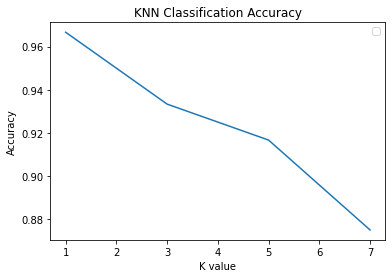

PCA Tuning for Alpha =  0.85 : 
Accuracy Score when Knn = 1 :
 0.9666666666666667
Accuracy Score when Knn = 3 :
 0.9333333333333333
Accuracy Score when Knn = 5 :
 0.9166666666666666
Accuracy Score when Knn = 7 :
 0.8416666666666667


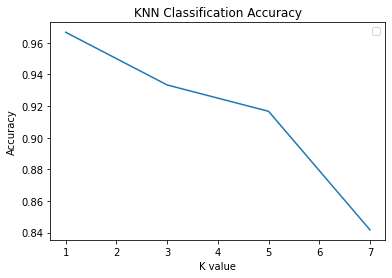

PCA Tuning for Alpha =  0.9 : 
Accuracy Score when Knn = 1 :
 0.9666666666666667
Accuracy Score when Knn = 3 :
 0.9333333333333333
Accuracy Score when Knn = 5 :
 0.9
Accuracy Score when Knn = 7 :
 0.8333333333333334


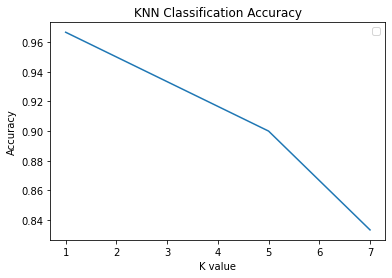

PCA Tuning for Alpha =  0.95 : 
Accuracy Score when Knn = 1 :
 0.95
Accuracy Score when Knn = 3 :
 0.9333333333333333
Accuracy Score when Knn = 5 :
 0.9166666666666666
Accuracy Score when Knn = 7 :
 0.85


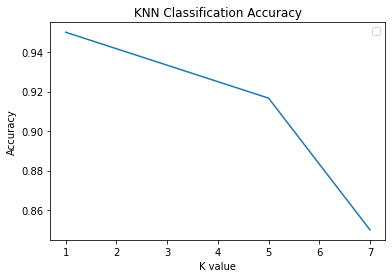

best accuracy  0.9666666666666667  for alpha = 0.8
First row of Sb
 [2396490.40039062 2396490.40039062 2396490.40039062 ... 2396490.40039062
 2396490.40039062 2396490.40039062]
First row of S
 [5.37142111 5.23854802 5.18057539 ... 0.26156132 0.1972977  0.54414663]


In [ ]:
#Bonus : a
#Faces Problem
data_matrix, labels = loadFaces()
x_train, x_test, y_train, y_test = split(0.7,data_matrix, labels)

execPCA(data_matrix, x_train, y_train, x_test, y_test)

execLDA(data_matrix, labels, x_train, y_train, x_test, y_test)

SVD is performed on the data matrix, which is typically centered by subtracting the mean of each feature. The resulting decomposition consists of three matrices: U, Σ, and V^T, where U and V^T are orthogonal matrices and Σ is a diagonal matrix containing the singular values of the data.

The principal components can then be calculated using the first k columns of U, where k is the desired number of principal components. These columns correspond to the left singular vectors of the data and represent the directions of maximum variance in the data.

In [ ]:
def _PCAfitSVD(data,alpha):
  _mean = np.mean(data,axis=0)
  Z = data - _mean
  U, s, Vt = np.linalg.svd(Z)
  explained_variance_ratio = (s ** 2) / np.sum(s ** 2)
  num_components = np.argmax(np.cumsum(explained_variance_ratio) >= alpha) + 1
  X_reduced = Z.dot(Vt.T[:, :num_components])
  return _mean,X_reduced

Regularized LDA (Linear Discriminant Analysis) is an extension of traditional LDA that incorporates regularization to improve the performance of the algorithm and prevent overfitting.

In [ ]:
def regularizedLDA(x_train, y_train,tol=10^-6):
  n = x_train.shape[0]
  oldEVR = newEVR = 0
  for n_components in range(1, n+1):
    lda = LDA(solver='lsqr', n_components=n_components)
    lda.fit(x_train, y_train)
    newEVR  = lda.explained_variance_ratio_
    if abs(newEVR-oldEVR)<tol:
      n = newEVR
      break
    oldEVR = newEVR
  return lda.transform(x_train)[:, :n]


In [ ]:
#Bonus : b
data_matrix, labels = loadFaces()
x_train, x_test, y_train, y_test = even_odd_split(data_matrix, labels)

#PCA Using Single Value Decomposition
execPCA(data_matrix, x_train, y_train, x_test, y_test,PCAfitter=_PCAfitSVD)

#Regularized LDA 
x_train_reduced = regularizedLDA(x_train,y_train)
x_test_reduced = regularizedLDA(x_test,y_test)
print("Regularized LDA Tuning :")
classTuning(x_train_reduced,y_train,x_test_reduced,y_test)